### Library Importation

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
#import xgboost as xgb

from sklearn.decomposition import PCA
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from pandas import DataFrame

### Data Set Importation

In [92]:
FileData=pd.read_csv("C:/Users/erick.monge/Desktop/Big Data/Deliverables/Module 5/4.Complete a Data Science Capstone Project/Data Sets/suicide-rates-overview-1985-to-2016.csv",header=0)
FileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country           27820 non-null object
year              27820 non-null int64
sex               27820 non-null object
age               27820 non-null object
suicides_no       27820 non-null int64
population        27820 non-null int64
percentage        27820 non-null float64
country_year      27820 non-null object
HDI               8364 non-null float64
GDP               27820 non-null float64
GDP_per_capita    27820 non-null int64
generation        27820 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


## Data selection
Data is filtered just with the Central and North America countries.

In [93]:
Countries=['El Salvador','Costa Rica','Mexico','Panama','United States','Belize','Guatemala','Canada','Nicaragua']
FileData = FileData[FileData.country.isin(Countries)]
FileData.head()

,country,year,sex,age,suicides_no,population,percentage,country_year,HDI,GDP,GDP_per_capita,generation
288,Costa Rica,1985,male,35-54 years,32,218000,14.68,Costa Rica1985,0.623,4.796628e+09,2145,Silent
289,Costa Rica,1985,male,25-34 years,32,219000,14.61,Costa Rica1985,0.623,4.796628e+09,2145,Boomers
290,Costa Rica,1985,male,55-74 years,12,91000,13.19,Costa Rica1985,0.623,4.796628e+09,2145,G.I. Generation
291,Costa Rica,1985,male,15-24 years,33,285800,11.55,Costa Rica1985,0.623,4.796628e+09,2145,Generation X
292,Costa Rica,1985,male,75plus years,1,13000,7.69,Costa Rica1985,0.623,4.796628e+09,2145,G.I. Generation


## Missing data analysis
Missing values are found and HDI feature is decided to be dropped because more than the 85% of its values are missing:

In [94]:
FileData.apply(lambda c: (c.replace(['Unknown', 'None', ''], np.nan).notna().sum() / c.size) * 100)
total = FileData.isnull().sum().sort_values(ascending=False)
FileData=FileData.drop("HDI",axis=1)
SuicidesData=FileData
total

HDI               1860
generation           0
GDP_per_capita       0
GDP                  0
country_year         0
percentage           0
population           0
suicides_no          0
age                  0
sex                  0
year                 0
country              0
dtype: int64

## Data Exploration Process
Graphs are generated in order to explore the data and found trends

### Sum of suicides by Age

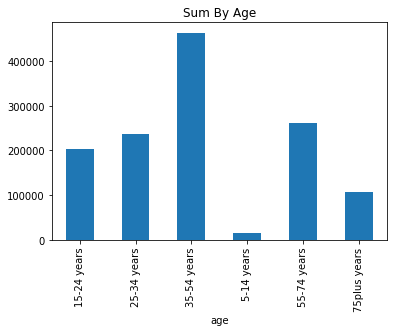

In [87]:
order=['5-14 years','15-24 years', '25-34 years','35-54 years','55-74 years','75plus years']
order=['5-14 years','15-24 years', '25-34 years','35-54 years','55-74 years','75plus years']
SuicidesData.groupby('age')['suicides_no'].sum().plot(kind='bar',title="Sum By Age")
plt.show()

### Suicides Average by Age

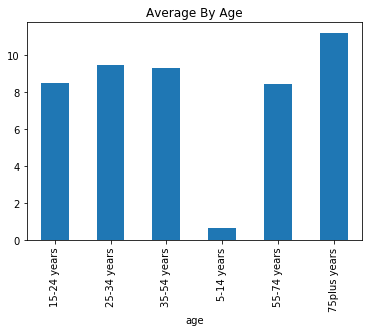

In [88]:
order=['5-14 years','15-24 years', '25-34 years','35-54 years','55-74 years','75plus years']
order=['5-14 years','15-24 years', '25-34 years','35-54 years','55-74 years','75plus years']
SuicidesData.groupby('age')['percentage'].mean().plot(kind='bar',title="Average By Age")
plt.show()

### Sum of suicides by Country

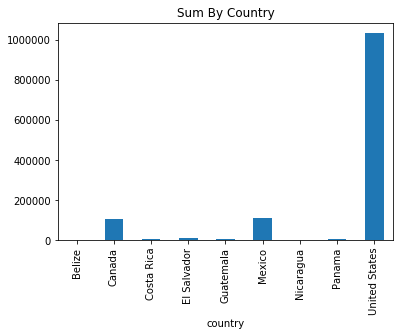

In [44]:
SuicidesData.groupby('country')['suicides_no'].sum().plot(kind='bar',title='Sum By Country')
plt.show()

### Suicides average by Country

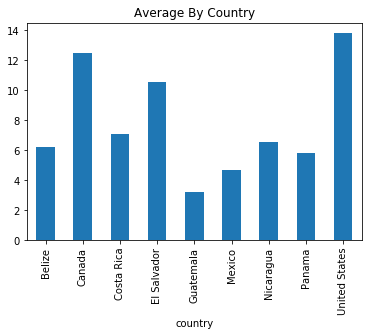

In [71]:
SuicidesData.groupby('country')['percentage'].mean().plot(kind='bar',title='Average By Country')
plt.show()

### Sum of Suicides by Sex

Default Female: sex
female    1404
male      1404
Name: sex, dtype: int64%


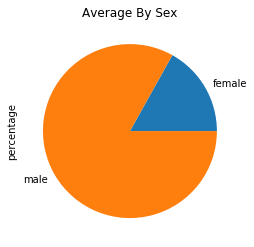

In [79]:
SuicidesData.groupby('sex')['percentage'].mean().plot(kind='pie', title='Average By Sex')
plt.show()

### Timeline of Suicides average

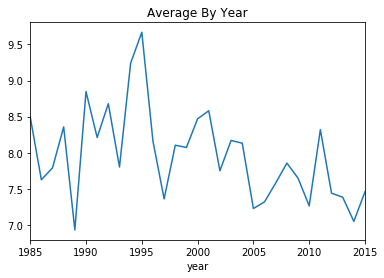

In [45]:
SuicidesData.groupby('year')['percentage'].mean().plot(kind='line', title='Average By Year')
plt.show()

### Suicides by GDP

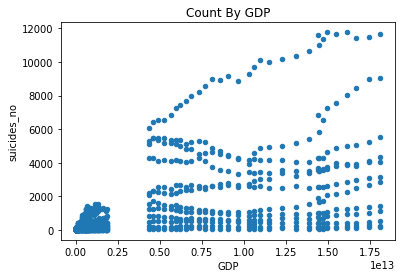

In [50]:
SuicidesData.plot(kind='scatter', x='GDP', y='suicides_no',title='Count By GDP')
plt.show()

## Data preparation
Data needs to be converted from strings to interger and from objects to categories.

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
SuicidesData['country'] = labelencoder_X.fit_transform(SuicidesData['country'])
SuicidesData['sex'] = labelencoder_X.fit_transform(SuicidesData['sex'])
SuicidesData['generation'] = labelencoder_X.fit_transform(SuicidesData['generation'])
SuicidesData['age'] = labelencoder_X.fit_transform(SuicidesData['age'])
onehotencoder = OneHotEncoder(categorical_features = [0])
SuicidesData

,country,year,sex,age,suicides_no,population,percentage,country_year,GDP,GDP_per_capita,generation
288,2,1985,1,2,32,218000,14.68,Costa Rica1985,4.796628e+09,2145,5
289,2,1985,1,1,32,219000,14.61,Costa Rica1985,4.796628e+09,2145,0
290,2,1985,1,4,12,91000,13.19,Costa Rica1985,4.796628e+09,2145,1
291,2,1985,1,0,33,285800,11.55,Costa Rica1985,4.796628e+09,2145,2
292,2,1985,1,5,1,13000,7.69,Costa Rica1985,4.796628e+09,2145,1
...,...,...,...,...,...,...,...,...,...,...,...
27205,8,2015,0,1,1444,21555712,6.70,United States2015,1.812070e+13,60387,4
27206,8,2015,0,0,1132,21633813,5.23,United States2015,1.812070e+13,60387,4
27207,8,2015,0,5,540,11778666,4.58,United States2015,1.812070e+13,60387,5
27208,8,2015,1,3,255,21273987,1.20,United States2015,1.812070e+13,60387,3


### Data Conversion
Some Features are converted from object to categorical, feature selection is performed and atributes are sort.

In [96]:
SuicidesData['country']=SuicidesData['country'].astype('category')
SuicidesData['sex']=SuicidesData['sex'].astype('category')
SuicidesData['age']=SuicidesData['age'].astype('category')
SuicidesData['generation']=SuicidesData['generation'].astype('category')

SuicidesData=SuicidesData[['country','year','sex','age','population','percentage','GDP','GDP_per_capita','generation','suicides_no']]
SuicidesData.head()

,country,year,sex,age,population,percentage,GDP,GDP_per_capita,generation,suicides_no
288,2,1985,1,2,218000,14.68,4.796628e+09,2145,5,32
289,2,1985,1,1,219000,14.61,4.796628e+09,2145,0,32
290,2,1985,1,4,91000,13.19,4.796628e+09,2145,1,12
291,2,1985,1,0,285800,11.55,4.796628e+09,2145,2,33
292,2,1985,1,5,13000,7.69,4.796628e+09,2145,1,1


In [97]:
SuicidesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 288 to 27209
Data columns (total 10 columns):
country           2808 non-null category
year              2808 non-null int64
sex               2808 non-null category
age               2808 non-null category
population        2808 non-null int64
percentage        2808 non-null float64
GDP               2808 non-null float64
GDP_per_capita    2808 non-null int64
generation        2808 non-null category
suicides_no       2808 non-null int64
dtypes: category(4), float64(2), int64(4)
memory usage: 165.4 KB


### Dependant and not Dependant variables are defined

In [98]:
DepVar=SuicidesData["suicides_no"]
NotDepVar=SuicidesData.iloc[:,0:9]
NotDepVar

,country,year,sex,age,population,percentage,GDP,GDP_per_capita,generation
288,2,1985,1,2,218000,14.68,4.796628e+09,2145,5
289,2,1985,1,1,219000,14.61,4.796628e+09,2145,0
290,2,1985,1,4,91000,13.19,4.796628e+09,2145,1
291,2,1985,1,0,285800,11.55,4.796628e+09,2145,2
292,2,1985,1,5,13000,7.69,4.796628e+09,2145,1
...,...,...,...,...,...,...,...,...,...
27205,8,2015,0,1,21555712,6.70,1.812070e+13,60387,4
27206,8,2015,0,0,21633813,5.23,1.812070e+13,60387,4
27207,8,2015,0,5,11778666,4.58,1.812070e+13,60387,5
27208,8,2015,1,3,21273987,1.20,1.812070e+13,60387,3


In [99]:
DepVar

288        32
289        32
290        12
291        33
292         1
         ... 
27205    1444
27206    1132
27207     540
27208     255
27209     158
Name: suicides_no, Length: 2808, dtype: int64

### Training and Testing data sets are established

In [16]:
X_Train=NotDepVar[:2245]
Y_Train=DepVar[:2245]

In [17]:
X_Test=NotDepVar[2245:2808]
Y_Test=DepVar[2245:2808]

### Cross Validation

In [18]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(NotDepVar, DepVar)
X_Train.shape, X_Test.shape

((2106, 9), (702, 9))

### Normalization

In [53]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)
X_Train

array([[ 0.06423078, -0.55964866,  1.00095012, ..., -0.40882108,
        -0.68946672, -0.92690745],
       [ 0.06423078,  0.69821695,  1.00095012, ..., -0.40410115,
        -0.61478363,  1.27508589],
       [ 0.06423078, -0.2165944 ,  1.00095012, ..., -0.40814436,
        -0.6795658 , -0.92690745],
       ...,
       [ 0.06423078, -1.24575717,  1.00095012, ..., -0.41087529,
        -0.74054497, -1.47740579],
       [ 0.06423078,  0.81256836, -0.99905078, ..., -0.40281513,
        -0.59262131,  1.27508589],
       [ 0.06423078,  0.58386553,  1.00095012, ..., -0.40509485,
        -0.63189714,  0.72458755]])

### First Model: Gradient Boosting

In [37]:
import xgboost as xgb

modelGB=xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
modelGB.fit(X_Train,Y_Train)
result=modelGB.score(X_Train,Y_Train)
print('Score: %.3f' % round(result, 3))

GBprediction = modelGB.predict(X_Test)
rmse = sqrt(mean_squared_error(Y_Test, GBprediction))
predRsquared = r2_score(Y_Test,GBprediction)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
GBprediction

Score: 1.000
R Squared: 0.997
RMSE: 75.328


array([ 3.12720299e+01, -1.17254412e+00,  1.40516682e+01,  8.67377186e+00,
        4.67406982e+03,  1.02419252e+01,  1.14640167e+02, -1.17254412e+00,
        4.74648254e+02,  2.44837939e+03,  2.82594929e+01,  5.44917984e+01,
        2.29505081e+02,  3.66154938e+02,  8.73280212e+02,  5.77541992e+02,
        1.67784595e+01,  6.53663826e+00,  8.33292770e+00,  2.00646957e+02,
        4.85108643e+03,  9.13281059e+00,  3.31727722e+02,  4.15683556e+01,
        9.16546265e+02,  1.27541650e+03,  2.24150009e+02,  4.63971143e+03,
        2.33458325e+03,  1.73319733e+02,  2.55784937e+03,  1.00151527e+02,
       -1.17254412e+00,  2.41923843e+02,  1.69024014e+00,  2.55815771e+03,
        4.78025770e+00,  8.62646103e+00,  1.40787926e+01,  1.14413315e+02,
        1.20514893e+03,  2.44796276e+01,  1.32738125e+00,  8.19592190e+00,
       -5.42600632e-01,  4.97463232e+03,  5.28124475e+00,  1.67619503e+00,
        1.00214905e+02,  2.24400091e+00,  5.34264421e+00, -1.17254412e+00,
        7.05473232e+00,  

### Second Model: Random Forest

In [38]:
modelRF = RandomForestRegressor(n_estimators=150)
modelRF.fit(X_Train,Y_Train)
result=modelRF.score(X_Train,Y_Train)
print('Score: %.3f' % round(result, 3))

RFprediction = modelRF.predict(X_Test)
rmse = sqrt(mean_squared_error(Y_Test, RFprediction))
predRsquared = r2_score(Y_Test,RFprediction)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
RFprediction

Score: 1.000
R Squared: 0.998
RMSE: 70.936


array([2.58400000e+01, 0.00000000e+00, 1.45866667e+01, 9.24000000e+00,
       4.66964000e+03, 9.46000000e+00, 1.28013333e+02, 0.00000000e+00,
       4.85766667e+02, 2.49979333e+03, 2.58466667e+01, 6.07533333e+01,
       2.74473333e+02, 3.85753333e+02, 9.06180000e+02, 5.98120000e+02,
       2.00000000e+01, 2.59333333e+00, 5.33333333e+00, 2.02560000e+02,
       4.94380000e+03, 3.16000000e+00, 3.14033333e+02, 3.97933333e+01,
       9.05293333e+02, 1.27167333e+03, 2.30786667e+02, 4.72235333e+03,
       2.29000667e+03, 1.54206667e+02, 2.53820667e+03, 1.00800000e+02,
       0.00000000e+00, 2.37673333e+02, 2.07333333e+00, 2.56074000e+03,
       4.78666667e+00, 8.58666667e+00, 1.89133333e+01, 1.19480000e+02,
       1.24100000e+03, 2.29533333e+01, 1.30666667e+00, 5.61333333e+00,
       0.00000000e+00, 4.85005333e+03, 3.78666667e+00, 1.10000000e+00,
       1.11380000e+02, 2.00666667e+00, 5.64666667e+00, 0.00000000e+00,
       4.26000000e+00, 5.17653333e+02, 1.74666667e+00, 2.21333333e+00,
      

### Thrith Model: Linear regression

In [39]:
modelLR = LinearRegression(normalize=True)
modelLR.fit(X_Train,Y_Train)
result=modelLR.score(X_Train,Y_Train)
print('Score: %.3f' % round(result, 3))

LRprediction = modelLR.predict(X_Test)
rmse = sqrt(mean_squared_error(Y_Test, LRprediction))
predRsquared = r2_score(Y_Test,LRprediction)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
LRprediction

Score: 0.679
R Squared: 0.690
RMSE: 793.103


array([ 8.17947170e+02, -2.86639343e+02, -2.19314692e+02, -2.51601515e+02,
        2.85278129e+03, -3.44356751e+02,  1.02831895e+03, -4.00212227e+02,
        9.93475671e+02,  3.59567841e+03, -8.31285578e+01,  4.79877865e+02,
        1.67844474e+02,  1.04422881e+03,  1.17314451e+03,  1.84114356e+03,
       -2.13314647e+02,  1.33886478e+02,  4.11077181e+02,  2.32840156e+03,
        3.22249398e+03,  6.19646864e+02,  2.05570533e+02,  9.02192619e+02,
        1.20716442e+03,  1.29506145e+03,  2.20071821e+03,  2.81401452e+03,
        3.88031573e+03,  9.31486997e+02,  2.55852374e+03,  7.14750621e+02,
       -3.06804240e+02,  8.63513284e+02, -4.58205209e+02,  2.09223415e+03,
       -3.47291460e+02, -4.31723390e+02, -3.88833788e+02,  7.55887378e+02,
        1.23846282e+03, -2.25452925e+02, -3.50656662e+02, -4.45368813e+02,
       -2.93465235e+02,  3.14541958e+03, -2.14968987e+02, -3.82400624e+02,
        5.83198023e+02, -3.82614026e+02, -2.07660445e+02, -3.61651538e+02,
       -5.21052172e+02,  

### Fourth model: Support Vector Regression

In [40]:
modelSVR = SVR()
modelSVR.fit(X_Train,Y_Train)
result=modelSVR.score(X_Train,Y_Train)
print('Score: %.3f' % round(result, 3))

SVRprediction = modelSVR.predict(X_Test)
rmse = sqrt(mean_squared_error(Y_Test, SVRprediction))
predRsquared = r2_score(Y_Test,SVRprediction)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
SVRprediction

Score: -0.043
R Squared: -0.061
RMSE: 1467.519


array([ 4.84553789e+01,  2.59370606e+00,  1.50766667e+01,  1.12151066e+01,
        1.53380181e+02,  9.45057362e+00,  7.18882180e+01,  1.25964038e+01,
        1.08549467e+02,  1.42383076e+02,  6.52878318e+01,  6.51906865e+01,
        4.35117147e+01,  9.25802334e+01,  1.01549466e+02,  1.66425018e+02,
        3.24980221e+01,  2.73352010e+01,  5.52608543e+01,  1.47506963e+02,
        1.58444071e+02,  7.11798126e+01,  6.69308540e+01,  5.22578400e+01,
        1.08546254e+02,  1.41641178e+02,  1.60241258e+02,  1.51767128e+02,
        1.49506757e+02,  6.81626669e+01,  1.10931784e+02,  8.66561438e+01,
        4.25212262e+00,  7.58871441e+01,  6.10676742e+00,  1.27363281e+02,
        3.42997145e+01,  3.73768200e+01,  9.73655927e+01,  7.95929120e+01,
        1.39748141e+02,  7.12118926e+01, -7.20399252e-01,  3.38932438e+01,
        1.39045551e+01,  1.79574143e+02,  1.73647700e+01, -1.56825292e-02,
        9.01750620e+01, -1.55343776e+00,  4.98744566e+00,  5.25909396e+00,
        5.11311116e+01,  